<a href="https://colab.research.google.com/github/yoonlee78/lab_workshop/blob/master/W7/W7_Chapter04_Training_of_Neural_Net_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning from scratch

## Chapter 04. 신경망 학습 Part 1

### 4.1. 데이터에서 학습한다!

신경망의 특징은 데이터를 보고 학습할 수 있다는 점이다. 데이터에서 학습한다는 것은 **가중치 매개변수**의 값을 데이터를 보고 자동으로 결정한다는 뜻이다. 

2장의 퍼셉트론 예에서는 진리표를 보면서 사람이 수작업으로 매개변수 값을 설정함. 하지만 이때는 매개변수가 겨우 3개였음. 그렇다면 실제 신경망에서는 매개 변수가 수천에서 수만가지까지 된다. 나아가 층을 깊게 한 딥러닝 정도 되면 그 수는 수억에 이를 수도 있다. 이쯤 되면 (아니 훨씬 전부터) 매개 변수를 수작업으로 정한다는 것은 아예 불가능하다. 이번 장에서는 신경망 학습 (데이터로부터 매개변수의 값을 정하는 방법)에 대해서 설명하고 파이썬으로 MNIST 데이터셋의 손글씨 숫자를 학습하는 코드를 구현해보자. 

### 4.1.1. 데이터 주도 학습

기계학습은 데이터가 생명이다. 데이터에서 답을 찾고 패턴을 발견하고 이야기를 만든다. 

기계학습에서는 사람의 개입을 최소화하고 수집한 데이터로부터 패턴을 찾고자 한다. 

신경망과 딥러닝은 기존 기계학습에서 사용하던 방법보다 사람의 개입을 더욱 배제할 수 있게 해주는 중요한 특성을 지녔다. 

구체적인 문제를 하나 더 생각해보자면 이미지에서 '5'라는 숫자를 인식하는 프로그램을 구현한다고 했을때, [그림 4-1]과 같은 자유분방한 손글씨 이미지를 보고 5인지 아닌지를 알아보는 프로그램을 구현하는 것이 목표다. '5'를 인식하는 대표 알고리즘을 밑바닥부터 설계하는 것은 어렵다, 대신 주어진 데이터를 잘 활용해서 해결하게 하면 된다. 그런 방법의 하나로, 이미지에서 **특징**<sup>feature</sup>을 추출하고 그 특징의 패턴을 기계학습 기술로 학습하는 방법이 있다. 여기서 말하는 특징은 입력 데이터 (입력 이미지)에서 본질적인 데이터 (중요한 데이터)를 정확하게 추출할 수 있도록 설계된 변환기를 가리킨다. 이미지의 특징은 보통 벡터로 기술하고 컴퓨터 비전 분야에서는 SIFT, SURF, HOG 등의 특징을 많이 사용한다. 

이런 특징을 사용하여 이미지 데이터를 벡터로 변환하고, 변환된 벡터를 가지고 지도 학습 방식의 대표 분류 기법인 SVM, KNN 등으로 학습할 수 있다. 

### 그림 4-2. 규칙을 '사람'이 만드는 방식에서  '기계'가 데이터로 배우는 방식으로의 패러다임 전환: 회색 블록 = 사람이 개입하지 않음'

딥러닝을 **종단간 기계학습: end-to-end machine learning** 이라고도 한다. 여기서 종단간은 '처음부터 끝가지'라는 의미로, 데이터(입력)에서 목표한 결과(출력)를 사람의 개입 없이 얻는다는 뜻을 담고 있다. 



### 4.1.2. 훈련 데이터와 시험 데이터

기계학습 문제는 데이터를 **훈련 데이터**training data와 **시험 데이터**test data로 나누어 학습과 실험을 수행하는 것이 일반적이다. 

### 4.2.1. 평균 제곱 오차

가장 많이 쓰이는 손실 함수는 **평균 제곱 오차**mean squared error, MSE이다. 평균 제곱 오차는 수식으로는 다음과 같다. 

- 수식. 4.1. 

여기서 y<sub>k</sub>는 신경망의 출력 (신경망이 추정한 값), t<sub>k</sub>은 정답 레이블, k는 데이터 차원 수를 나타낸다. 

\begin{equation*}
E = \frac{1}{2} \sum_{k} (y_{k}-t_{k})^{2}
\end{equation*}

y<sub>k</sub> : 신경망의 출력(신경망이 추정한 값) <br>
t<sub>k</sub> : 정답 레이블 <br>
k :  데이터의 차원 수 <br>

In [0]:

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

배열들의 원소는 첫 번째 인덱스부터 순서대로 숫자 '0', '1', '2', ...일 때 값

y = 신경망의 출력 =  소프트맥스 함수의 출력

t 정답을 의미하는 위치의 원소는 1로, 그 외에는 0으로 표기

소프트맥스 함수의 출력은 확률로 해석할 수 있으므로 이 예에서는 이미지가 0일 확률은 0.1, '1'일 확률은 0.05, '2'일 확률은 0.6이라고 해석됨. 

[지난 시간 복습] **원-핫 인코딩**: 한 원소만 1로 하고 그 외는 0으로 나타내는 표기법

숫자 '2'에 해당하는 원소의 값이 1이므로 정답이 '2'임을 알 수 있다. 

평균 제곱 오차 파이썬 구현

In [0]:
def mean_squared_error(y, t):
  return 0.5 * np.sum((y-t)**2)

여기서 인수 y와 t는 넘파이 배열이다. 이 코드 [4.1]을 그대로 구현한 것이니 설명은 생략한다. 

In [0]:
import numpy as np

In [0]:
#정답은 '2'

t = [0,0,1,0,0,0,0,0,0,0]

In [0]:
#예1: '2'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [0]:
#예2 : '7'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

In [0]:
mean_squared_error(np.array(y), np.array(t))

0.5975

위 두 가지 예시에서 첫 번째의 예의 정답은 '2'이고 신경망의 출력도 '2'에서 가장 높은 경우이다. 두 번째 예에서는 정답은 똑같이 '2'지만, 신경망의 출력은 '7'에서 가장 높다.

이 실험의 결과로 첫 번째 예의 손실 함수 쪽 출력이 작으며 정답 레이블과의 오차도 작은 것을 알 수 있다. 즉, 평균 제곱 오차를 기준으로는 첫 번째 추정 결과가 (오차가 더 작으니) 정답에 더 가까울 것으로 판단할 수 있다. 


### 4.2.2. 교차 엔트로피 오차 

또 다른 손실 함수로서 **교차 엔트로피 오차**(cross entropy error)도 자주 이용한다. 

\begin{equation*}
E = - \sum_{k} t_{k} log y_{k}
\end{equation*}

여기에서 log는 밑이 e인 자연로그(log<sub>e</sub>)이다.

y<sub>k</sub>는 신경망의 출력, t<sub>k</sub>는 정답 레이블이다. 

또, t<sub>k</sub>는 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0이다 (원-핫 인코딩).

그래서 식[4.2]는 실질적으로 정답일 때의 추정 (t<sub>k</sub>가 1일 때의  y<sub>k</sub>)의 자연로그를 계산하는 식이 된다. 

예를 들어 정답 레이블은 '2'가 정답이라 하고 이때의 신경망 출력이 0.6이라면 교차 엔트로피 오차는 -log0.6 = 0.51이 된다. 또한, 같은 조건에서 신경망 출력이 0.1이라면 -log0.1=2.30이 된다. 즉, 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 된다.

한편, [그림4-3]은 자연로그의 그래프이다. 

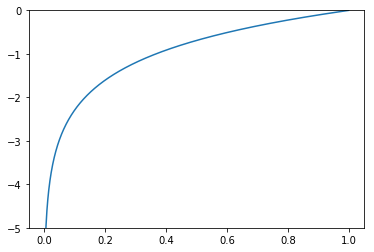

In [0]:
%matplotlib inline
import matplotlib.pylab as plt

x = np.arange(0.001, 1.0, 0.001)
y = np.log(x)
plt.plot(x, y)
plt.ylim(-5.0, 0.0) # y축의 범위 지정
plt.show()

이 그림에서 보듯이 x가 1일 때, y는 0이 되고 x가 0에 가까워질수록 y의 값은 점점 작아진다. 

[식 4.2]도 마찬가지로 정답에 해당하는 출력이 커질수록 0에 다가가다가, 그 출력이 1일 때 0이 된다. 반대로 정답일 때의 출력이 작아질수록 오차는 커진다. 

그럼 교차 엔트로피 오차를 구해보자 

In [0]:
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t* np.log(y + delta))

여기서 y와 t는 넘파이 배열이다. **단, ** 코드 마지막에 np.log를 계산할 때 아주 작은 값인 delta를 더했다. 이는 no.log()함수에 0을 입력하면 마이너스 무한대를 뜻하는 -inf가 되어 더 이상 계산을 진행할 수 없게 되기 때문이다. 아주 작은 값을 더해서 절대 0이 되지 않도록, 즉 마이너스 무한대가 발생하지 않도록 한 것. 그러면 이 cross_entropy_error(y, t)함수를 써서 간단한 계산을 해보자 (정답은 똑같이 2이다)

In [0]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [0]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

첫 번째 예는 정답일 때의 출력이 0.6인 경우로, 이때의 교차 엔트로피 오차는 약 0.51이다. 그 다음은 정답일 때의 출력이 (더 낮은) 0.1인 경우로, 이때의 교차 엔트로피 오차는 무려 2.3이다. 즉, 결과 (오차 값)가 더 작은 첫 번째 추정이 정답일 가능성이 높다고 판단한 것으로, 앞서 평균 제곱 오차의 판단과 일치하다. 

### 4.2.3. 미니배치 학습

기계학습 문제는 훈련 데이터를 사용해 학습한다. 더 구체적으로 말하면 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개 변수를 찾아낸다. 

이렇게 하려면 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야한다. 즉, 훈련 데이터가 100개 있으면 그로부터 계산한 100개의 손실 함수 값들의 합을 지표로 삼는다. 

지금까지는 데이터 하나에 대한 손실 함수만 생각해왔으니, 이제 훈련 데이터 모두에 대한 손실 함수의 합을 구하는 방법을 생각해보자. 예를 들어 교차 엔트로피 오차는 [식 4.3]처럼 된다. 

[식 4.3.]

\begin{equation*}
E = - \frac{1}{N} \sum_{n} \sum_{k} t_{nk} log y_{nk}
\end{equation*}

이때 데이터가 N개라면, _t_<sub>nk</sub>는 _n_ 번째 데이터의 _k_ 번째 값을 의미한다. (_y_<sub>nk</sub>는 신경망의 출력, _t_<sub>nk</sub>는 정답 레이블이다)

수식이 좀 복잡해 보이지만 데이터 하나에 대한 손실 함수인 [식 4.2]를 단순히 N개의 데이터로 확장했을 뿐이다. 다만 마지막에 N으로 나누어 정규화하고 있다. _N_ 으로 나눔으로써 '평균 손실 함수'를 구하는 것이다. 이렇게 평균을 구해 사용하면 훈련 데이터 개수와 관계없이 언제든 통일된 지표를 얻을 수 있다. (훈련 데이터가 1,000개든, 10,000개든 상관없이 평균 손실 함수를 구할 수 있다. )

MNIST데이터셋은 훈련 데이터가 60,000개였다. 그래서 모든 데이터를 대상으로 손실 함수의 합을 구하려면 시간이 좀 걸린다. 더 나아가 빅데이터의 수준이 되면 그 수는 수백만에서 수천만도 넘는 거대한 값이 되기도 한다. 이 많은 데이터를 대상으로 일일이 손실 함수를 계산하는 것은 현실적이지 않다. 이런 경우 데이터 일부를 추려 전체의 '근사치'로 이용할 수 있다. 신경망 학습에서도 훈련 데이터로부터 일부만 골라 학습을 수행한다. 이 일부를 **미니배치**mini-batch라고 한다. 가령 60,000장의 훈련 데이터 중에서 100장을 무작위로 뽑아 그 100장만을 사용하여 학습한 것이다. 이러한 학습 방법을 **미니배치 학습**이라고 한다. 

In [1]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch.git

fatal: destination path 'deep-learning-from-scratch' already exists and is not an empty directory.


In [3]:
!ls

deep-learning-from-scratch  sample_data


In [0]:
import os

In [0]:
os.chdir("./deep-learning-from-scratch")

In [12]:
!ls

1_vs_2.png  ch03  ch06	common		 equations_and_figures.zip  README.md
ch01	    ch04  ch07	cover_image.jpg  LICENSE.md
ch02	    ch05  ch08	dataset		 map.png


In [11]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000, 10)


앞의 코드에서 MNIST 데이터를 읽은 결과, 훈련 데이터는 60,000개고, 입력 데이터는 784열 (원래는 28 * 28)인 이미지 데이터임을 알 수 있다. 또, 정답 레이블은 10줄짜리 데이터이다. 그래서 앞의 x_train, t_train의 모습은 각각 (60000, 784)와 (60000,10)이 된다. 

그러면 이 훈련 데이터에서 무작위로 10장만 빼내려면 ?  넘파이의 np.random.choice()함수를 쓰면 다음과 같이 간단히 해결 가능 


In [0]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

np.random.choice()로는 지정한 범위의 수 중에서 무작위로 원하는 개수만 꺼낼 수 있습니다. 가령 np.random.choice(60000, 10)은 0이상 60000 미만의 수 중에서 무작위로 10개를 골라낸다. 

다음은 실제로 돌려본 모습이다. 이 함수가 출력한 배열을 미니배치로 뽑아낼 데이터의 인덱스로 사용해도 된다. 

In [14]:
np.random.choice(60000,10)

array([53924, 17190, 51610, 52518, 29875, 50233, 24900, 56268,  8458,
       10828])

이제 무작위로 선택한 이 인덱스를 사용해 미니배치를 뽑아내기만 하면 된다. 손실 함수도 이 미니배치로 계산한다. 

### 4.2.4. (배치용) 교차 엔트로피 오차 구현하기

그럼, 미니배치 같은 배치 데이터를 지원하는 교차 엔트로피 오차는 어떻게 구현할까?

조금 전에 구현한 교차 엔트로피 오차 (데이터를 하나씩 처리하는 구현)를 조금만 바꿔주면 된다. 

여기에서는 데이터가 하나인 경우와 데이터가 배치로 묶여 입력될 경우 모두를 처리할 수 있도록 구현한다. 

In [0]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

이 코드에서 y는 신경망의 출력,  t는 정답 레이블이다. y가 1차원이라면, 즉 데이터 하나당 교차 엔트로피 오차를 구하는 경우는 reshape 함수로 데이터의 형상을 바꿔준다. 그리고 배치의 크기로 나눠 정규화하고 이미지 1장당 평균의 교차 엔트로피 오차를 계산한다. 

정답 레이블이 원-핫 인코딩이 아니라 '2'나 '7'의 숫자 레이블로 주어졌을 때의 교차 엔트로피 오차는 다음과 같이 구현할 수 있다. 


In [0]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7))/ batch_size

이 구현에서는 원-핫 인코딩일 때 t가 0인 원소는 교차 엔트로피 오차도 0이므로, 그 계산은 무시해도 좋다는 것이 핵심입니다. 

다시 말하면 정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차를 계산할 수 있다. 그래서 원-핫 인코딩시 t*np.log(y)였던 부분을 레이블 표현일 때는 np.log(y[np.arange(batch_size),t])로 구현한다. (설명을 간결히 하기 위해 미세한 값 1e-7은 언급하지 않겠다)

참고로 np.log(y[np.arange(batch_size), t])를 간단히 설명하자면 아래와 같다. 

np.arange(batch_size)는 0부터 batch_size -1 까지 배열을 생성한다. 

즉, batch_size가 5이면 np.arang(batch_size)는 [0, 1, 2, 3, 4]라는 넘파이 배열을 생성한다. 

t 에는 레이블이 [2, 7, 0, 9, 4]와 같이 저장되어 있으므로 y[np.arange(batch_size), t]는 각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출한다.
**이 예에서는 y[np.arange(batch_size), t]는 [y[0, 2], y[1, 7], y[2, 0], y[3, 9], y[4, 4]]인 넘파이 배열을 생성



### 4.2.5. 왜 손실 함수를 설정하는가? 

_신경망을 학습할 때 정확도를 지표로 삼아서는 안 된다. 정확도를 지표로 하면 매개 변수의 미분이 대부분의 장소에서 0이 되기 때문이다_
